# Assignment 3 - Eleanor Adachi

Our team's code can be found here: https://github.com/eleanor-adachi/ARE212_Materials

## 1. Exercises (GMM)

When we approach a new estimation problem from a GMM perspective there’s a simple set of steps we can follow.
- Describe the parameter space $B$;
- Describe a function $g_j(b)$ such that $\mathbb{E}g_j(\beta) = 0$;
- Describe an estimator for the covariance matrix $\mathbb{E}g_j(\beta)g_j(\beta)^⊤$.

### (1) Explain how the steps outlined above can be used to construct an optimally weighted GMM estimator.

The optimally weighted (efficient) GMM estimator is constructed as follows:

1. **Describe the Parameter Space $B$**: This step involves defining the set of parameters, denoted as $\beta$, that you want to estimate. The parameter space $B$ represents all possible values for the parameters of interest, i.e., $\beta \in B$.

2. **Describe a Function $g_j(\beta)$**: For each moment condition, represented by the function $g_j(\beta)$, you define a function that depends on the parameters of interest (denoted as $\beta$). The key aspect here is that the expected value of each moment condition should be equal to zero. Mathematically, it's represented as $\mathbb{E}g_j(\beta) = 0$, where $\beta$ represents the true parameter values.

3. **Describe an Estimator for the Covariance Matrix**: To construct an optimally weighted GMM estimator $b_{GMM}$, you need to estimate the covariance matrix of the moment conditions, $\Omega = \mathbb{E}g_j(\beta)g_j(\beta)^T$. In practice, since $\mathbb{E}g_j(b) \neq 0$ if the model is overidentified ($\ell > k$), then $\hat{\Omega} = \mathbb{E}g_j(b)g_j(b)^T - \mathbb{E}g_j(b)\mathbb{E}g_j(b)^T$

4. **Optimally Weighted GMM Estimator**: With the moment conditions and their covariance matrix defined, you can construct the GMM estimator. The GMM estimator is then calculated as:

$
b_N = \underset{b \in B}{\operatorname{argmin}} g_N(b)^T A g_N(b)
$

where $b$ represents the initial guess for the parameter vector, $A$ is the optimal weighting matrix such that $A = \Omega^{-1}$, and $g_j(b)$ are the moment conditions evaluated at the estimated parameters and $g_N(b) = \frac{1}{N} \sum_{j=1}^{N} g_j(b)$.

The goal is to find the weighting matrix $A$ that minimizes the variance of $b_N$. By choosing the weighting matrix optimally, the GMM estimator can achieve efficiency and robustness in estimating the parameters of interest. The weights are chosen such that more reliable moment conditions contribute more to the estimation process, leading to improved parameter estimates.

The asymptotic variance of the optimally weighted GMM estimator will be 

$$
V_b = \left(Q^\top\Omega^{-1}Q\right)^{-1}.
$$

where $Q = \mathbb{E}\frac{\partial g_j}{\partial b^\top}(b)$


### (2) Consider the following models. For each, provide a causal diagram; construct the optimally weighted GMM estimator of the unknown parameters (various Greek letters); and give an estimator for the covariance matrix of your estimates. If any additional assumptions are required for your estimator to be identified please provide these.

#### (a) $\mathbb{E}y = \mu; \mathbb{E}(y − \mu)^2 = \sigma^2; \mathbb{E}(y − \mu)^3 = 0$.  *Note: $y$ is a random variable.*

See https://math.stackexchange.com/questions/92648/calculation-of-the-n-th-central-moment-of-the-normal-distribution-mathcaln

See causal diagram below.

$$
g_i(\mu, \sigma^2) = \left( \begin{align}
    & y_i - \mu \\
    & (y_i - \mu)^2 - \sigma^2 \\
    & (y_i - \mu)^3
\end{align} \right)
$$

$$
\Omega(\mu, \sigma^2) = ???
$$

Solutions are:

$$
\hat{\mu} = \frac{1}{N} \sum_{i=1}^{N} y_i \\
\hat{\sigma}^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{\mu})^2
$$

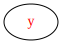

In [304]:
import graphviz as gr

g = gr.Digraph()
g.node('y', fontcolor='red')

g

#### (b) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$.  *Note: $y$, $X$, and $u$ are random variables.*

Assume that $u$ ~ $N[0, \Omega]$.

$$
g_j(\beta) = X_j (y_j - \alpha - X_j' \beta) \\
g_N(\beta) = \frac{1}{N} \sum_{j=1}^{N} X_j (y_j - \alpha - X_j' \beta) \\
\mathbb{E}(u u^T) = \Omega
$$

$$
g_i(\alpha, \beta) = \left( \begin{align}
    & \frac{1}{N} \sum_{i=1}^{N} X_i^T u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i
\end{align} \right)
$$

where $u_i = y_i - \alpha - X_i' \beta$

Optimally weighted GMM estimator and its variance:

$$
a_N = \bar{y} - b_N \bar{X} \\
b_N = (X^T \Omega^{-1} X)^{-1} (X^T \Omega^{-1} y) \\
var(b_N) = (X^T \Omega^{-1} X)^{-1}
$$

where $\bar{y} = \frac{1}{N} \sum_{i=1}^{N} y_i$ and $\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i$

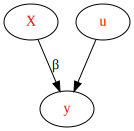

In [305]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')
g.edge('X', 'y', label='β')

g

#### (c) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = \sigma^2$.  *Note: $y$, $X$, and $u$ are random variables.*

$$
g_i(\alpha, \beta, \sigma) = \left( \begin{align}
    & \frac{1}{N} \sum_{i=1}^{N} X_i^T u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i^2 - \sigma^2
\end{align} \right)
$$

#### (d) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^Tu) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = e^{X \sigma}$.  *Note: $y$, $X$, and $u$ are random variables.*

$$
g_i(\alpha, \beta, \sigma) = \left( \begin{align}
    & \frac{1}{N} \sum_{i=1}^{N} X_i^T u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i^2 - e^{X \sigma}
\end{align} \right)
$$

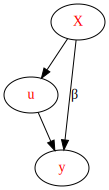

In [306]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')
g.edge('X', 'u')
g.edge('X', 'y', label='β')

g

#### (e) $y = \alpha + X \beta + u$; with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X = Q$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

Assume that $u$ is homoskedastic??

Assume that $Q$ is a positive definite matrix???

$$
g_i(\alpha, \beta) = \left( \begin{align}
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^T u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^T X_i - Q
\end{align} \right)
$$

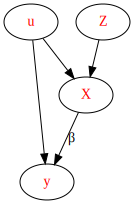

In [307]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('Z', fontcolor='red')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')
g.edge('u', 'X')
g.edge('Z', 'X')
g.edge('X', 'y', label='β')

g

#### (f) $y = f(X \beta) + u$; with $f$ a known scalar function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X f'(X \beta) = Q(\beta)$. (Bonus question: where does this last restriction come from, and what role does it play?)  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

In [308]:
# TODO: Where does this last restriction come from, and what role does it play???

# First order conditions??

Assume that $Q(\beta)$ is a positive definite matrix???

$$
g_i(\beta, Q) = \left( \begin{align}
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^T u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^⊤ X_i f'(X_i \beta) - Q(\beta)
\end{align} \right)
$$

Where does $\mathbb{E}Z^⊤ X f'(X \beta) = Q(\beta)$ come from?

$$
J(\beta) = n \bar{g}_n(\beta)^T W \bar{g}_n(\beta)
$$

Non-linear GMM (see Hansen 13.25):

Under general regularity conditions, $\sqrt{n}(b_{gmm} - \beta) \xrightarrow[]{d} N(0, V_\beta)$, where

$$
V_\beta = (Q^T W Q)^{-1} (Q^T W \Omega W Q) (Q^T W Q)^{-1}
$$

with $\Omega = \mathbb{E}[g_j g_j^T]$ and

$$
Q = \mathbb{E} \frac{\partial}{\partial \beta^T}g_j(\beta)
$$

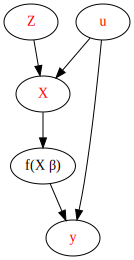

In [309]:
import graphviz as gr

g = gr.Digraph()
g.node('X', fontcolor='red')
g.node('Z', fontcolor='red')
g.node('f(X β)')
g.node('u', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('X', 'f(X β)')
g.edge('u', 'y')
g.edge('u', 'X')
g.edge('Z', 'X')
g.edge('f(X β)', 'y')

g

#### (g) $y = f(X, \beta) + u$; with $f$ a known function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \frac{\partial f}{\partial \beta^T} (X, \beta) = Q(\beta)$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*


Assume that $Q(\beta)$ is a positive definite matrix???

$$
g_i(\beta, Q) = \left( \begin{align}
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^T u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^T \frac{\partial f}{\partial \beta^T} (X_i, \beta) - Q(\beta)
\end{align} \right)
$$

Third moment equation??

$$
Q = \mathbb{E} \frac{\partial}{\partial \beta^T}g_j(\beta)
$$

In [310]:
# TODO: How use the first-order condition for dgp??

#### (h) $y^\gamma = \alpha + u$, with $y > 0$ and $\gamma$ a scalar, and $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \begin{bmatrix} \gamma y^{\gamma − 1} \\ −1 \end{bmatrix} = Q(\gamma)$.  *Note: $y$, $Z$, and $u$ are random variables.*

$$
g_i(\alpha, \gamma, Q) = \left( \begin{align}
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^T u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} u_i \\
    & \frac{1}{N} \sum_{i=1}^{N} Z_i^T \begin{bmatrix} \gamma y_i^{\gamma − 1} \\ −1 \end{bmatrix} - Q(\gamma)
\end{align} \right)
$$

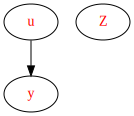

In [311]:
import graphviz as gr

g = gr.Digraph()
g.node('u', fontcolor='red')
g.node('Z', fontcolor='red')
g.node('y', fontcolor='red')
g.edge('u', 'y')

g

### (3) For each of the models above write a data-generating process in python. Your function `dgp` should take as arguments a sample size $N$ and a vector of "true" parameters `b0`, and return a dataset $(y, X)$.

#### (a) $\mathbb{E}y = \mu; \mathbb{E}(y − \mu)^2 = \sigma^2; \mathbb{E}(y − \mu)^3 = 0$.  *Note: $y$ is a random variable.*

In [312]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

def dgp_a(N, b0):
    '''
    Generate dataset for GMM model A
    
    Takes as inputs sample size N and vector of true parameters (mu and sigma), b0
    
    Returns a tuple with numpy array y, all of length N
    '''
    # Retrieve true parameters
    mu = b0[0]
    sigma = b0[1]

    # Construct u
    u = iid.norm(loc=mu, scale=sigma)
    
    # Construct y
    y = u.rvs(N)
    
    # Store in DataFrame
    df = pd.DataFrame(columns=['y'])
    df['y'] = y
    return df[['y']]

In [313]:
np.random.seed(1234)

y = dgp_a(100, [0, 1])

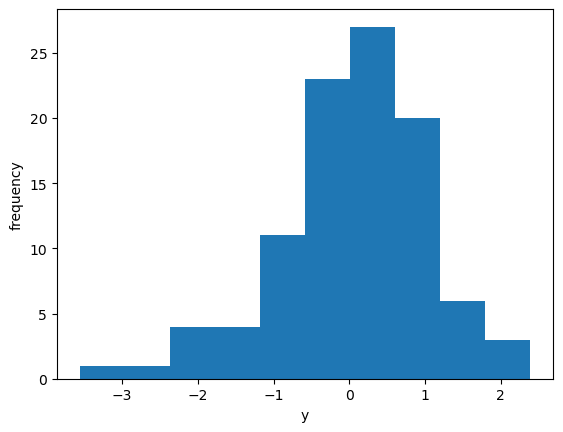

In [314]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.xlabel('y')
plt.ylabel('frequency')
plt.show()

#### (b) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$.  *Note: $y$, $X$, and $u$ are random variables.*

In [315]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Structural parameters;
mu = 0
sigma = 1

# Construct u
u = iid.norm(loc=mu, scale=sigma)

def dgp_b(N, b0):
    '''
    Generate dataset for GMM model B
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y and X, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    
    # Construct X
    X = np.random.normal(size=N)
    
    # Construct y
    y = alpha + X*beta + u.rvs(N)
    
    # Store in DataFrame
    df = pd.DataFrame(columns=['y', 'X'])
    df['y'] = y
    df['X'] = X
    return df[['y']], df[['X']]

In [316]:
np.random.seed(1234)

alpha = 1
beta = 2
N = 100

y, X = dgp_b(N, [alpha, beta])

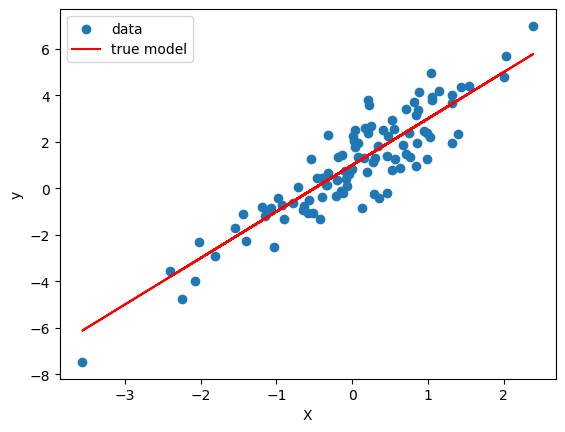

In [317]:
import matplotlib.pyplot as plt

y_true = alpha + X*beta

plt.scatter(X, y, label='data')
plt.plot(X, y_true, label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (c) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^T u) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = \sigma^2$.  *Note: $y$, $X$, and $u$ are random variables.*

In [318]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

def dgp_c(N, b0):
    '''
    Generate dataset for GMM model C
    
    Takes as inputs sample size N and vector of true parameters (alpha, beta, and sigma), b0
    
    Returns a tuple with numpy arrays y and X, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    sigma = b0[2]

    # Construct u
    u = iid.norm(loc=0, scale=sigma)
    
    # Construct X
    X = np.random.normal(size=N)
    
    # Construct y
    y = alpha + X*beta + u.rvs(N)
    
    # Store in DataFrame
    df = pd.DataFrame(columns=['y', 'X'])
    df['y'] = y
    df['X'] = X
    return df[['y']], df[['X']]

In [319]:
np.random.seed(1234)

alpha = 1
beta = 2
sigma = 2
N = 100

y, X = dgp_c(N, [alpha, beta, sigma])

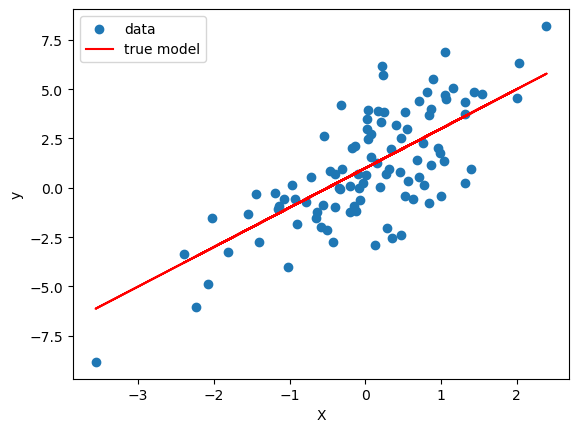

In [320]:
import matplotlib.pyplot as plt

y_true = alpha + X*beta

plt.scatter(X, y, label='data')
plt.plot(X, y_true, label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (d) $y = \alpha + X \beta + u$; with $\mathbb{E}(X^Tu) = \mathbb{E}u = 0$, and $\mathbb{E}(u^2) = e^{X \sigma}$.  *Note: $y$, $X$, and $u$ are random variables.*

???

How create $u$ such that $\mathbb{E}(u^2) = e^{X \sigma}$???

#### (e) $y = \alpha + X \beta + u$; with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X = Q$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

In [321]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# def dgp_e(N, b0, pi=4, sigma_u=1, sigma_v=2):
#     '''
#     Generate dataset for GMM model E
    
#     Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
#     Returns a tuple with numpy arrays y, X and Z, all of length N
#     '''
#     # Retrieve true parameters
#     alpha = b0[0]
#     beta = b0[1]
    
#     # Construct random variables
#     u = iid.norm(scale=sigma_u).rvs(N)
#     v = iid.norm(scale=sigma_v).rvs(N)
#     Z = iid.norm().rvs(N)
    
#     # Construct X and y
#     X = Z*pi + v
#     y = X*beta + u

#     df = pd.DataFrame({'y':y, 'x':X, 'z':Z, 'Constant':1})

#     return df[['y']], df[['Constant','x']], df[['Constant','z']]

# 2 instruments
def dgp_e(N, b0, pi=[3,4], sigma_u=2, sigma_v=3):
    '''
    Generate dataset for GMM model E
    
    Takes as inputs sample size N and vector of true parameters (alpha and beta), b0
    
    Returns a tuple with numpy arrays y, X and Z, all of length N
    '''
    # Retrieve true parameters
    alpha = b0[0]
    beta = b0[1]
    
    # Construct random variables
    u = iid.norm(scale=sigma_u).rvs(N)
    v = iid.norm(scale=sigma_v).rvs(N)
    Z = iid.norm().rvs(size=(N,len(pi)))
    
    # Construct X and y
    X = Z@pi + v
    y = X*beta + u
    X = X.reshape(len(Z), 1)
    y = y.reshape(len(Z), 1)
    
    # Construct z_cols and z_dict
#     z_cols = []
#     z_dict = {}
#     for i in range(len(pi)):
#         z_col = 'z'+str(i+1)
#         z_cols.append(z_col)
#         z_dict[z_col] = Z[:, i]
    
#     # Construct df
#     combined_dict = {'y':y, 'x':X, 'Constant':1}
#     combined_dict.update(z_dict)
#     df = pd.DataFrame(combined_dict)

#     return df[['y']], df[['Constant','x']], df[['Constant']+z_cols]

    return y, X, Z

In [322]:
np.random.seed(1234)

alpha = 1
beta = 2
N = 100

y, X, Z = dgp_e(N, [alpha, beta], pi=[3,4])

In [323]:
Z[:, 0]

array([-0.3195614 ,  0.15699838,  1.05763318, -0.52462735,  1.91075943,
        0.51308214,  1.04394466,  1.45992748,  0.7491846 ,  0.44026639,
       -0.27664613,  0.41120402,  0.22636323, -0.38788623,  1.12638582,
        0.12117181, -0.15709914, -1.24765292,  0.58107332,  0.39932544,
       -0.27577373,  0.86306486, -1.39205408,  1.18194411, -0.88104709,
        1.86380106, -1.40708455,  0.00375985, -0.83884292, -0.50404272,
        1.52940067,  0.31301313,  0.29907053,  0.36317735, -0.48575274,
        0.02355761, -0.31868493,  0.17738672,  0.02350459,  0.35376929,
       -0.49048359, -2.39750398,  0.06308454, -1.26560054, -0.35450871,
        0.38625369, -0.68378982,  0.03187997, -0.05053969, -1.55334234,
        0.52704645, -0.21754548, -1.74213763,  1.43118375,  0.1702969 ,
        0.28858132,  0.17160238, -0.0253489 ,  0.92444287, -0.73103334,
        0.99599297,  0.71384077, -0.80703831,  1.90877966,  0.75965253,
        0.18167275,  0.06791236, -0.17080103,  1.38299725,  0.13

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


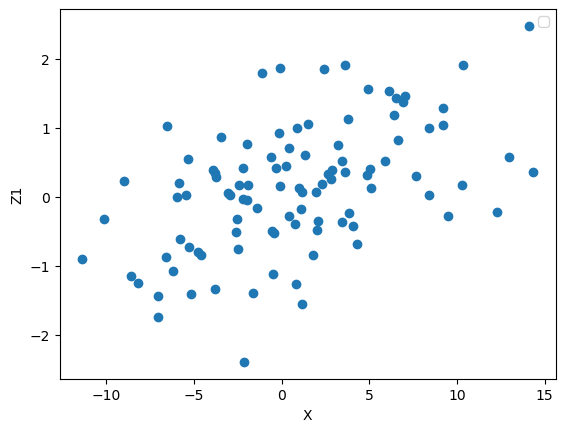

In [324]:
import matplotlib.pyplot as plt

plt.scatter(X, Z[:, 0])
plt.xlabel('X')
plt.ylabel('Z1')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


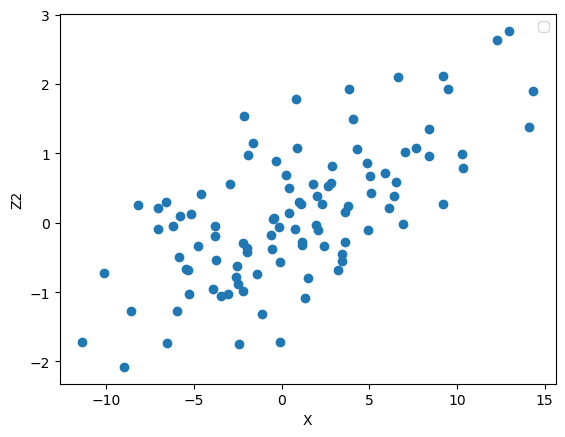

In [325]:
import matplotlib.pyplot as plt

plt.scatter(X, Z[:, 1])
plt.xlabel('X')
plt.ylabel('Z2')
plt.legend()
plt.show()

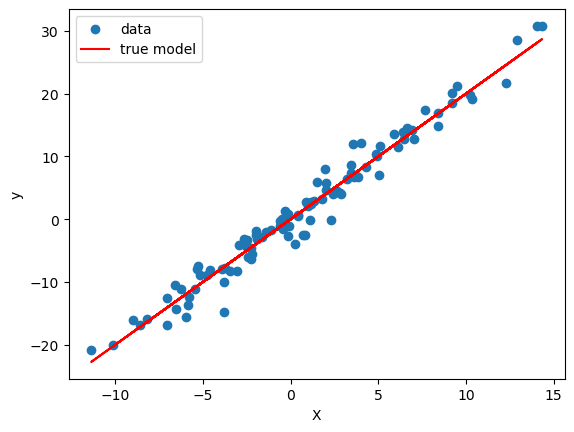

In [326]:
import matplotlib.pyplot as plt

y_true = X*beta

plt.scatter(X, y, label='data')
plt.plot(X, y_true, label='true model', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

#### (f) $y = f(X \beta) + u$; with $f$ a known scalar function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ X f'(X \beta) = Q(\beta)$.

#### (g) $y = f(X, \beta) + u$; with $f$ a known function and with $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \frac{\partial f}{\partial \beta^T} (X, \beta) = Q(\beta)$.  *Note: $y$, $X$, $Z$, and $u$ are random variables.*

#### (h) $y^\gamma = \alpha + u$, with $y > 0$ and $\gamma$ a scalar, and $\mathbb{E}(Z^⊤u) = \mathbb{E}u = 0$ and $\mathbb{E}Z^⊤ \begin{bmatrix} \gamma y^{\gamma − 1} \\ −1 \end{bmatrix} = Q(\gamma)$.  *Note: $y$, $Z$, and $u$ are random variables.*

### (4) Select the most interesting of the data generating processes you developed, and using the code in `gmm.py` or `GMM_class.py` (see https://github.com/ligonteaching/ARE212_Materials/) use data from your `dgp` to analyze the finite sample performance of the corresponding GMM estimator you’ve constructed. Of particular interest is the distribution of your estimator using a sample size $N$ and how this distribution compares with the limiting distribution as $N \to \infty$.

In [327]:
import numpy as np
from numpy.linalg import inv
from scipy.optimize import minimize_scalar

def gj(b,y,X,Z):
    """Observations of g_j(b).

    This defines the deviations from the predictions of our model; i.e.,
    e_j = Z_ju_j, where EZ_ju_j=0.

    Can replace this function to testimate a different model.
    """
    return Z*(y - X*b)

def gN(b,data):
    """Averages of g_j(b).

    This is generic for data, to be passed to gj.
    """
    e = gj(b,*data) # is this actually a residual? Why do we call it e instead of gj?

    # Check to see more obs. than moments.
    assert e.shape[0] > e.shape[1], "Need more observations than moments!"
    
    return e.mean(axis=0)

def Omegahat(b,data):
    """Calculate estimate of Omega, inverse of weighting matrix"""
    
    e = gj(b,*data)

    # IMPORTANT: Recenter! We have Eu=0 under null.
    # Important to use this information.
    e = e - e.mean(axis=0) 
    
    # TODO: Where does 1/N come from?
    return e.T@e/e.shape[0] # Omega = (u u^T)/N??

def J(b,W,data):
    """Define GMM criterion function"""

    m = gN(b,data) # Sample moments @ b
    N = data[0].shape[0]

    return (N*m.T@W@m) # Scale by sample size

def two_step_gmm(data):

    # First step uses identity weighting matrix
    # data is a tuple
    W1 = np.eye(gj(1,*data).shape[1]) # *tuple means treat elements of this iterable as positional arguments

    # b1 is value of b that minimizes J given initial estimate of weighting matrix
    b1 = minimize_scalar(lambda b: J(b,W1,data)).x # minimize_scalar().x returns value that minimizes this function
    # remember that b1 is consistent

    # Construct 2nd step weighting matrix using
    # first step estimate of beta
    W2 = inv(Omegahat(b1,data))

    return minimize_scalar(lambda b: J(b,W2,data))

In [328]:
N = 1000 # Sample size
# N = 100 # What if reduce to 100?

D = 1000 # Monte Carlo draws

b_draws_1000 = []
J_draws_1000 = []

# true parameters
alpha = 1
beta = 2

for d in range(D):
    soltn = two_step_gmm(dgp_e(N, [alpha, beta], pi=[3,4]))
    b_draws_1000.append(soltn.x)
    J_draws_1000.append(soltn.fun)

In [329]:
# What if reduce sample size?
N = 100

b_draws_100 = []
J_draws_100 = []

for d in range(D):
    soltn = two_step_gmm(dgp_e(N, [alpha, beta], pi=[3,4]))
    b_draws_100.append(soltn.x)
    J_draws_100.append(soltn.fun)

In [330]:
# What if increase sample size?
N = 10000

b_draws_10000 = []
J_draws_10000 = []

for d in range(D):
    soltn = two_step_gmm(dgp_e(N, [alpha, beta], pi=[3,4]))
    b_draws_10000.append(soltn.x)
    J_draws_10000.append(soltn.fun)

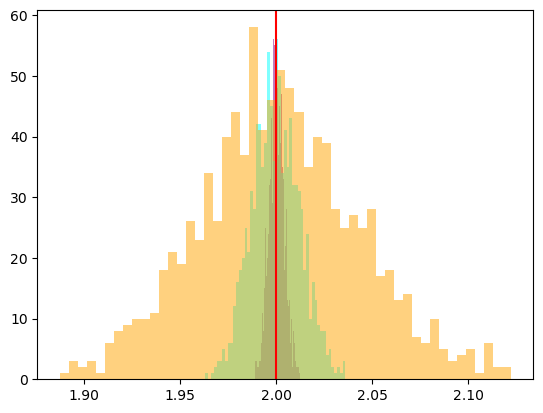

In [331]:
_ = plt.hist(b_draws_10000, bins=50, color='purple', alpha=0.5)
_ = plt.hist(b_draws_1000, bins=50, color='cyan', alpha=0.5)
_ = plt.hist(b_draws_100, bins=50, color='orange', alpha=0.5)
_ = plt.axvline(beta, color='r')

In [332]:
Q = Z.T@X
Winv = Omegahat(beta,(y,X,Z))

In [333]:
# Limiting distribution of criterion (under null)
limiting_J = iid.chi2(2-1)

# Limiting SE of b
# note, avar is embedded: avar(b) = inv(Q.T@inv(Winv)@Q)
sigma_0 = lambda N: np.sqrt(inv(Q.T@inv(Winv)@Q)/N)[0][0] 

# Limiting distribution of estimator
limiting_b = iid.norm(loc=beta,scale=sigma_0(N)) # from central limit theorem

print("Monte Carlo standard errors: %g" % np.std(b_draws))
print("Asymptotic approximation: %g" % sigma_0(N)) # asymptotic distribution is doing a "good job" capturing the variance of our estimator
print("Critical value for J statistic: %g (5%%)" % limiting_J.isf(.05))

Monte Carlo standard errors: 0.0205936
Asymptotic approximation: 3.9647e-05
Critical value for J statistic: 3.84146 (5%)


0.949


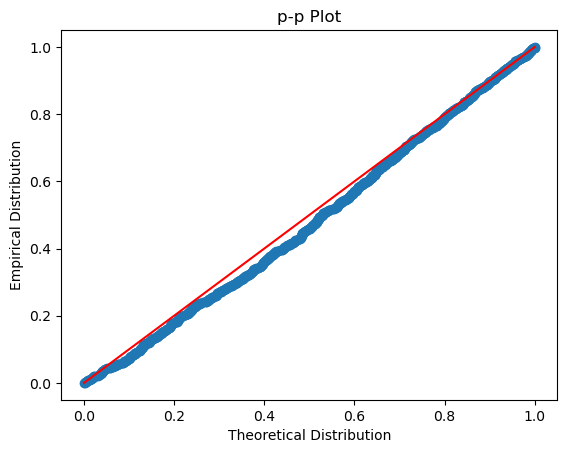

In [334]:
def ppplot(data,dist):
    data = np.array(data)

    # Theoretical CDF, evaluated at points of data
    P = [dist.cdf(x) for x in data.tolist()]

    # Empirical CDF, evaluated at points of data
    Phat = [(data<x).mean() for x in data.tolist()]

    fig, ax = plt.subplots()
    
    ax.scatter(P,Phat)
    ax.plot([0,1],[0,1],color='r') # Plot 45
    ax.set_xlabel('Theoretical Distribution')
    ax.set_ylabel('Empirical Distribution')
    ax.set_title('p-p Plot')

    return ax
    
_ = ppplot(J_draws_100, limiting_J)
print(np.mean(np.array(J_draws_100) < limiting_J.isf(.05)))

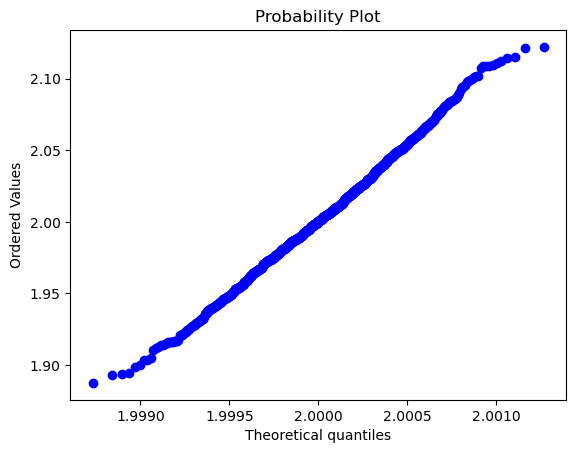

In [341]:
from scipy.stats import probplot

limiting_b = iid.norm(loc=beta,scale=sigma_0(100)) # from central limit theorem
_ = probplot(b_draws_100,dist=limiting_b,fit=False,plot=plt) # looking for 45 degree line

0.945


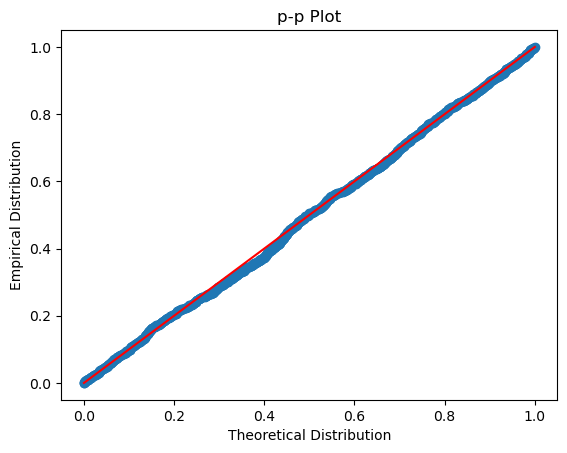

In [335]:
_ = ppplot(J_draws_1000, limiting_J)
print(np.mean(np.array(J_draws_1000) < limiting_J.isf(.05)))

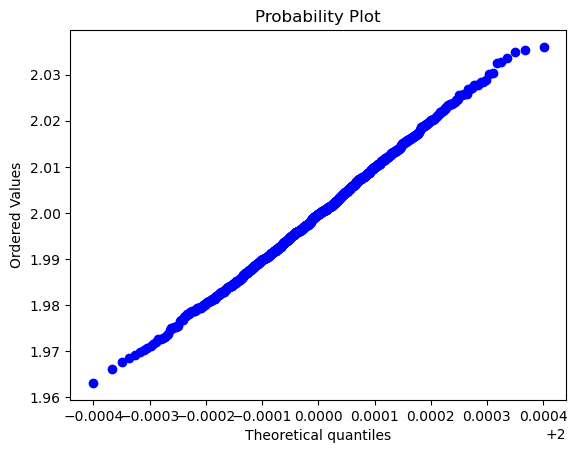

In [342]:
from scipy.stats import probplot

limiting_b = iid.norm(loc=beta,scale=sigma_0(1000)) # from central limit theorem
_ = probplot(b_draws_1000,dist=limiting_b,fit=False,plot=plt) # looking for 45 degree line

0.945


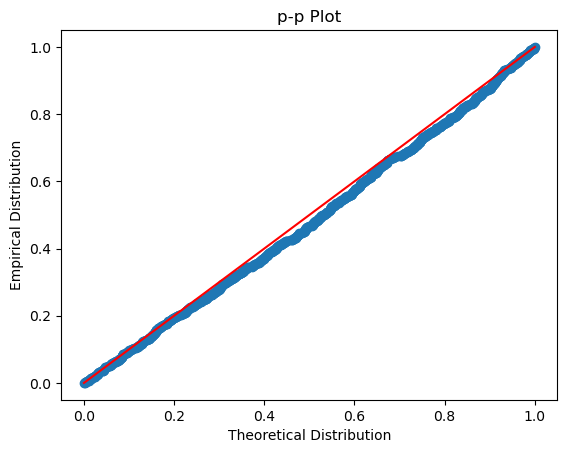

In [336]:
_ = ppplot(J_draws_10000, limiting_J)
print(np.mean(np.array(J_draws_10000) < limiting_J.isf(.05)))

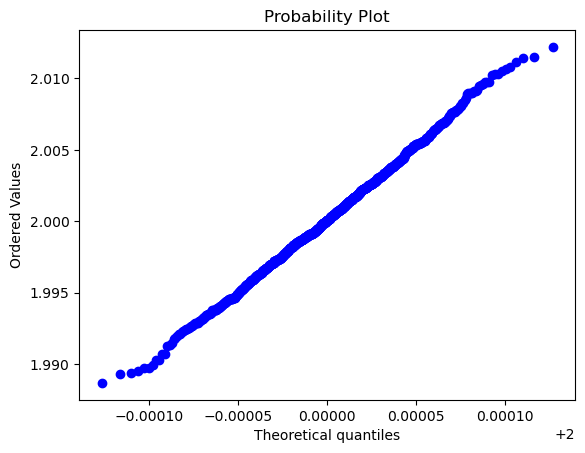

In [343]:
from scipy.stats import probplot

limiting_b = iid.norm(loc=beta,scale=sigma_0(10000)) # from central limit theorem
_ = probplot(b_draws_10000,dist=limiting_b,fit=False,plot=plt) # looking for 45 degree line

## 2. Exercises (Cross-Validation)

Consider estimation of a linear model $y = X \beta + u$, with the identifying
assumption that $\mathbb{E}(u|X) = 0$.

When we compute K-fold cross-validation of a tuning parameter $\lambda$ (e.g., the penalty parameter in a LASSO regression), then for each value of $\lambda$ we obtain $K$ estimates of any given parameter, say $\beta_i$; denote the estimates of this parameter by $b_i^. = (b_i^1 , . . . , b_i^K)$. If our total sample (say $D_1$) comprises $N$ iid observations, then each of our $K$ estimates will be based on a sample $D_1^k$ of roughly $N \frac{K−1}{K}$ observations.

### (1) How can you use the estimates $b_i^.$ to estimate the variance of the estimator?

### (2) What can you say about the variance of your estimator of the variance? In particular, how does it vary with $K$?

## 3. Breusch-Pagan Extended

Consider a linear regression of the form

$y = \alpha + \beta x + u$,

with $(y, x)$ both scalar random variables, where it is assumed that (a.i) $\mathbb{E}(u \cdot x) = \mathbb{E}u = 0$ and (a.ii) $\mathbb{E}(u^2|x) = \sigma^2$.

### (1) The condition a.i is essentially untestable; explain why.

### (2) Breusch and Pagan (1979) argue that one can test a.ii via an auxiliary regression $\hat{u}^2 = c+dx+e$, where the $\hat{u}$ are the residuals from the first regression, and the test of a.ii then becomes a test of $H_0 : d = 0$. Describe the logic of the test of a.ii.

### (3) Use the two conditions a.i and a.ii to construct a GMM version of the Breusch-Pagan test.

### (4) What can you say about the performance or relative merits of the Breusch-Pagan test versus your GMM alternative?

### (5) Suppose that in fact that $x$ is distributed uniformly over the interval $[0, 2\pi]$, and $\mathbb{E}(u^2|x) = \sigma^2(x) = \sigma^2 sin(2x)$, thus violating a.ii. What can you say about the performance of the Breusch-Pagan test in this circumstance? Can you modify your GMM test to provide a superior alternative?

### (6) In the above, we’ve considered a test of a specific functional form for the variance of $u$. Suppose instead that we don’t have any prior information regarding the form of $\mathbb{E}(u^2|x) = f(x)$. Discuss how you might go about constructing an extended version of the Breusch-Pagan test which tests for $f(x)$ non-constant.

### (7) Show that you can use your ideas about estimating $f(x)$ to construct a more efficient estimator of $\beta$ if $f(x)$ isn’t constant. Relate your estimator to the optimal generalized least squares (GLS) estimator.